# Pathway patterns throughout the day

## Aim

Show key pathway statistics broken down by arrival time of day (which we know in three hour intervals).

Replicates SAMueL-1 analysis [available to view here](https://samuel-book.github.io/samuel-1/descriptive_stats/02a_daily_patterns.html).

## Set up

In [1]:
# Import packages and functions
import collections
from dataclasses import dataclass
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from math import ceil

# Set max rows when display dataframe
pd.set_option('display.max_rows', 100)

# Linting
%load_ext pycodestyle_magic
%pycodestyle_on

In [2]:
# Set paths and filenames
@dataclass(frozen=True)
class Paths:
    '''Singleton object for storing paths to data and files.'''

    data_path = './../output/'
    admission_only_filename = 'reformatted_data_admissions_only.csv'


paths = Paths()

In [3]:
# Load data
data_full = pd.read_csv(os.path.join(paths.data_path,
                                     paths.admission_only_filename))

## Reformat data

Add extra columns for analysis.

In [4]:
# Group by whether aged 80 or older
data_full['age_80_plus'] = np.where(data_full['age'] >= 80, 1, 0)

# Group by whether known onset to arrival time is 4 hours or less
data_full['arrive_4h_known'] = np.where(
    (data_full['onset_to_arrival_time'] <= 240) &
    (data_full['onset_known'] == 1), 1, 0)

## Summarise key pathway metrics by time of day

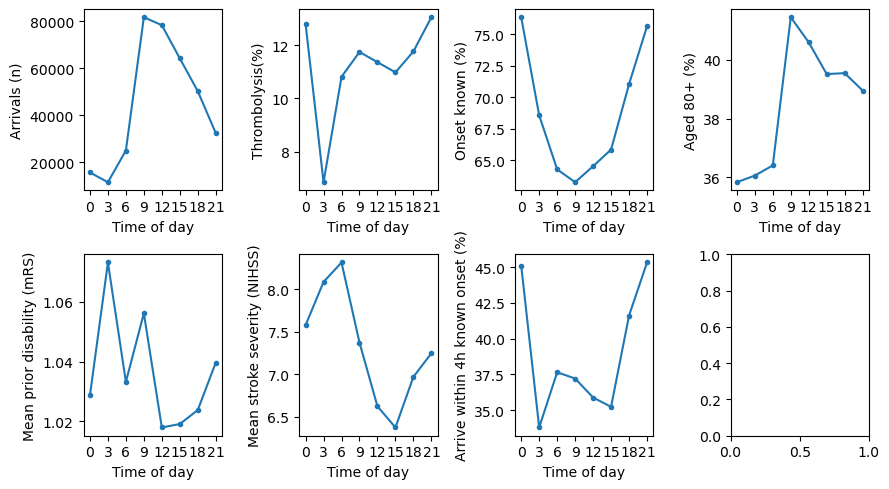

In [5]:
# Define columns of interest and appropriate labels
pathway_col = {'arrivals': 'Arrivals (n)',
               'thrombolysis': 'Thrombolysis(%)',
               'onset_known': 'Onset known (%)',
               'age_80_plus': 'Aged 80+ (%)',
               'prior_disability': 'Mean prior disability (mRS)',
               'stroke_severity': 'Mean stroke severity (NIHSS)',
               'arrive_4h_known': 'Arrive within 4h known onset (%)'}

# Create subplots, with number of rows from number of variables
columns = 4
rows = ceil(len(pathway_col)/columns)
fig, ax = plt.subplots(rows, columns, figsize=(9, 5))

# Convert keys and values into arrays
keys = [k for k in pathway_col.keys()]
values = [v for v in pathway_col.values()]

# Create plots
x = 0
for r in range(rows):
    for c in range(columns):
        # Stops loop (so will leave empty plots)
        if len(pathway_col) == x:
            break
        else:
            # Extract relevant column and label from dictionary
            col = keys[x]
            label = values[x]

            if col == 'arrivals':
                # Count number of rows
                res = data_full.groupby('arrival_time_3_hour_period').size()
            else:
                # Find mean, grouped by arrival time window
                res = (data_full
                       .groupby('arrival_time_3_hour_period')[col]
                       .mean())

            # If its marked as percentage, multiply by 100
            if '%' in label:
                res = res*100

            # Plot those results
            res.plot(marker='.', ax=ax[r, c])
            ax[r, c].set_xticks(res.index)
            ax[r, c].set_xlabel('Time of day')
            ax[r, c].set_ylabel(label)

            # Increment counter
            x += 1

# Display plot
plt.tight_layout()
plt.show()